## Name: David Geng

## Car Data: Regression Analysis
Predicting price of cars

### Loading libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from plotnine import *
import seaborn as sns

### Loading the Dataset

In [2]:
# # loading dataset
# from google.colab import files
# uploaded = files.upload()

In [3]:
# reading the dataset
cars = pd.read_csv('cars.csv')

### Descriptive Analytics

In [4]:
# first few rows
cars.head()

,price,age,km,fuel_type,hp,metallic_color,color,automatic,cc,doors,tax,weight
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,210,1170


In [5]:
# doors distribution
cars.doors.value_counts()

5    674
3    622
4    138
2      2
Name: doors, dtype: int64

In [6]:
# revmoving 2 doors cars
cars = cars.query('doors > 2')

In [7]:
# doors distribution
cars.doors.value_counts()

5    674
3    622
4    138
Name: doors, dtype: int64

In [8]:
# last few rows
cars.tail()

,price,age,km,fuel_type,hp,metallic_color,color,automatic,cc,doors,tax,weight
1431,7500,69,20544,Petrol,86,1,Blue,0,1300,3,69,1025
1432,10845,72,19000,Petrol,86,0,Grey,0,1300,3,69,1015
1433,8500,71,17016,Petrol,86,0,Blue,0,1300,3,69,1015
1434,7250,70,16916,Petrol,86,1,Grey,0,1300,3,69,1015
1435,6950,76,1,Petrol,110,0,Green,0,1600,5,19,1114


In [9]:
# dataset info
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           1434 non-null   int64 
 1   age             1434 non-null   int64 
 2   km              1434 non-null   int64 
 3   fuel_type       1434 non-null   object
 4   hp              1434 non-null   int64 
 5   metallic_color  1434 non-null   int64 
 6   color           1434 non-null   object
 7   automatic       1434 non-null   int64 
 8   cc              1434 non-null   int64 
 9   doors           1434 non-null   int64 
 10  tax             1434 non-null   int64 
 11  weight          1434 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 145.6+ KB


In [10]:
# unique values
cars.nunique()

price              236
age                 77
km                1262
fuel_type            3
hp                  11
metallic_color       2
color               10
automatic            2
cc                  13
doors                3
tax                 13
weight              59
dtype: int64

In [11]:
# changing to categorical
cars.metallic_color = cars.metallic_color.astype('category')

In [12]:
# changing to categorical
cars.automatic = cars.automatic.astype('category')

In [13]:
# changing to categorical
cars.doors = cars.doors.astype('category')

In [14]:
# dataset info
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1434 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           1434 non-null   int64   
 1   age             1434 non-null   int64   
 2   km              1434 non-null   int64   
 3   fuel_type       1434 non-null   object  
 4   hp              1434 non-null   int64   
 5   metallic_color  1434 non-null   category
 6   color           1434 non-null   object  
 7   automatic       1434 non-null   category
 8   cc              1434 non-null   int64   
 9   doors           1434 non-null   category
 10  tax             1434 non-null   int64   
 11  weight          1434 non-null   int64   
dtypes: category(3), int64(7), object(2)
memory usage: 116.6+ KB


### Graphical Summary

/Users/weigeng/opt/anaconda3/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 46'. Pick better value with 'binwidth'.


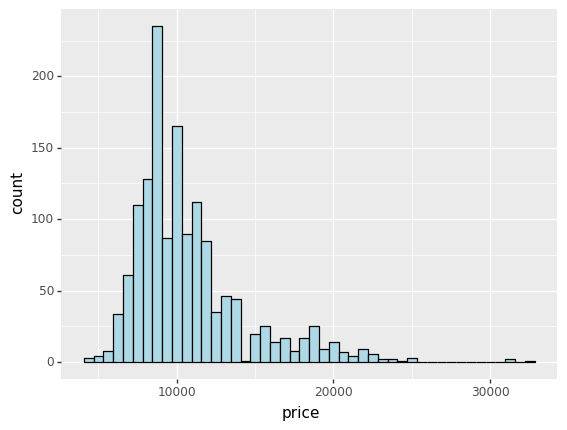

<ggplot: (8778919947171)>

In [15]:
# price histogram
ggplot(cars, aes(x = 'price')) + geom_histogram(fill = 'lightblue', color = 'black')

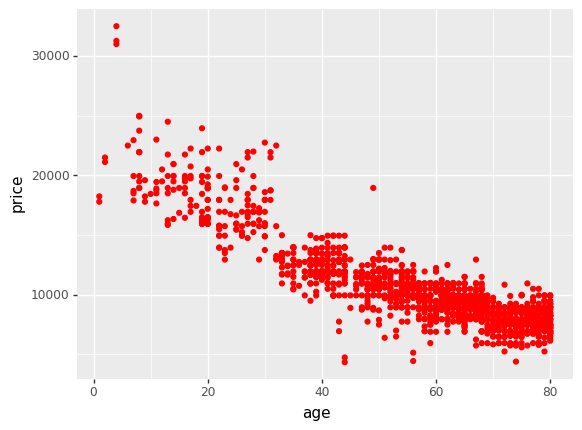

<ggplot: (8778920319208)>

In [16]:
# scatterplot price vs age
ggplot(cars, aes(x='age', y='price')) + geom_point(color = 'red')

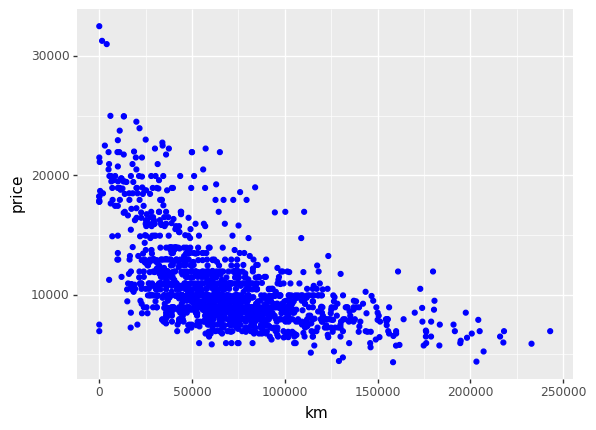

<ggplot: (8778919782840)>

In [17]:
# scatterplot price vs km
ggplot(cars, aes(x='km', y='price')) + geom_point(color = 'blue')

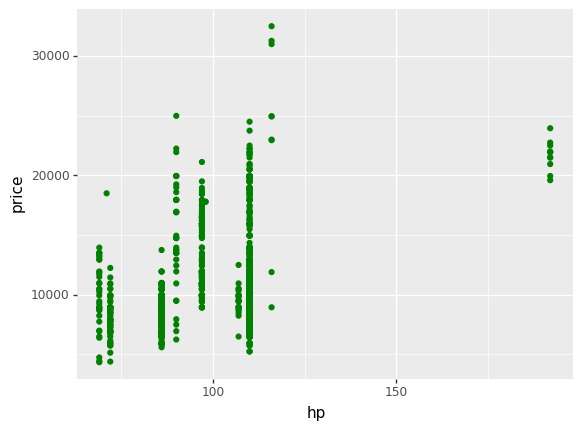

<ggplot: (8778920491623)>

In [18]:
# HW scatterplot price vs hp
ggplot(cars, aes(x='hp', y='price')) + geom_point(color = 'green')

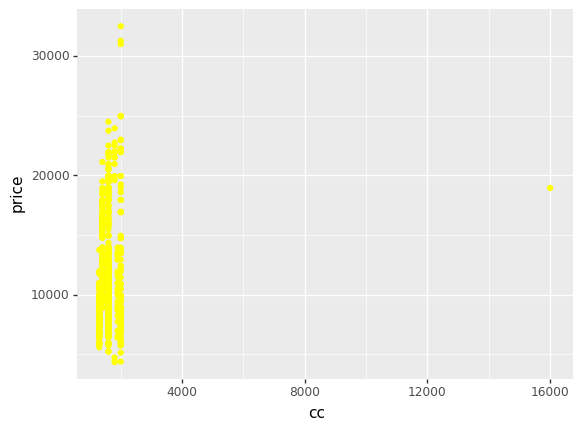

<ggplot: (8778919851599)>

In [19]:
# HW scatterplot price vs cc
ggplot(cars, aes(x='cc', y='price')) + geom_point(color = 'yellow')

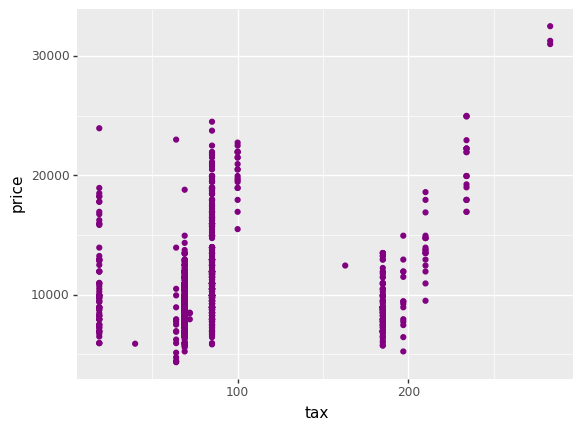

<ggplot: (8778920712569)>

In [20]:
# HW scatterplot price vs tax
ggplot(cars, aes(x='tax', y='price')) + geom_point(color = 'purple')

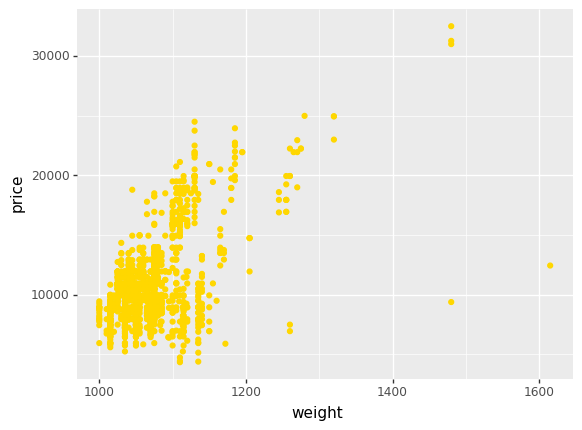

<ggplot: (8778920813415)>

In [21]:
# HW scatterplot price vs weight
ggplot(cars, aes(x='weight', y='price')) + geom_point(color = 'gold')

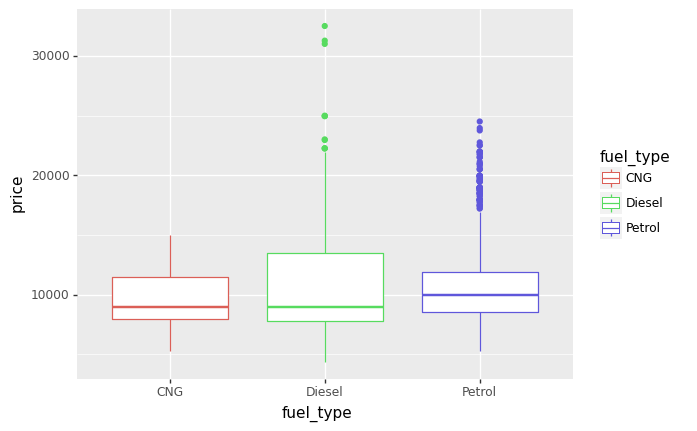

<ggplot: (8778919820644)>

In [22]:
# boxplot price vs fuel_type
ggplot(cars, aes(x = 'fuel_type', y = 'price', color = 'fuel_type')) + geom_boxplot()

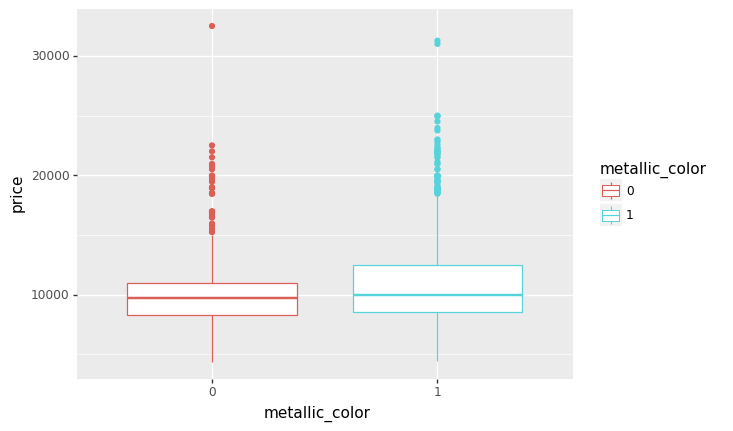

<ggplot: (8778921078456)>

In [23]:
# boxplot price vs metallic_color
ggplot(cars, aes(x = 'metallic_color', y = 'price', color = 'metallic_color')) + geom_boxplot()

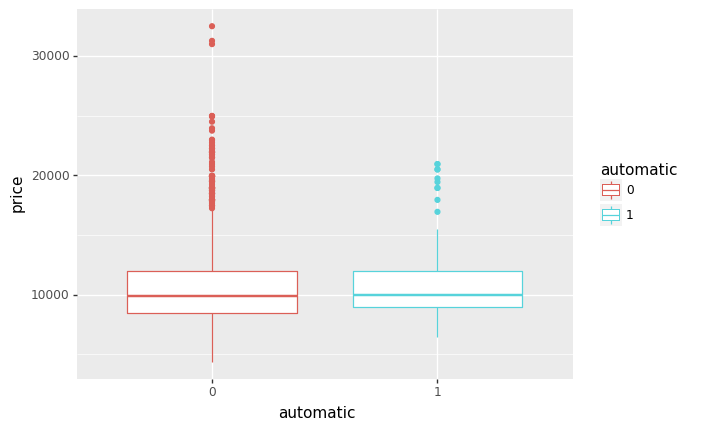

<ggplot: (8778921302038)>

In [24]:
# boxplot price vs automatic
ggplot(cars, aes(x = 'automatic', y = 'price', color = 'automatic')) + geom_boxplot()

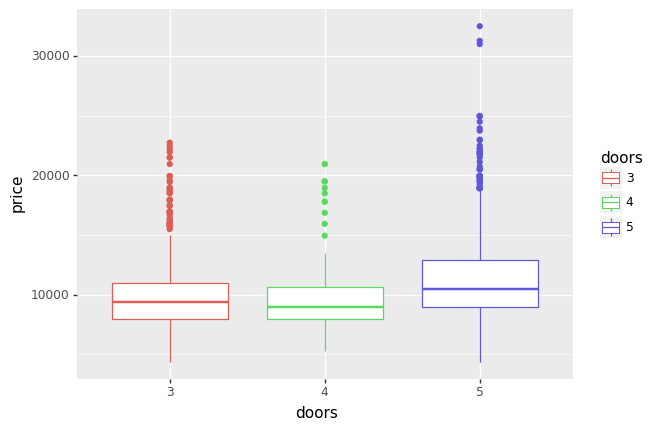

<ggplot: (8778919918716)>

In [25]:
# boxplot price vs doors
ggplot(cars, aes(x = 'doors', y = 'price', color = 'doors')) + geom_boxplot()

In [26]:
# correlation matrix
cars.corr()

,price,age,km,hp,cc,tax,weight
price,1.000000,-0.876521,-0.569740,0.314108,0.126721,0.220407,0.581697
age,-0.876521,1.000000,0.505304,-0.155499,-0.098504,-0.199860,-0.470788
km,-0.569740,0.505304,1.000000,-0.331782,0.101693,0.276556,-0.029482
hp,0.314108,-0.155499,-0.331782,1.000000,0.036786,-0.297830,0.090103
cc,0.126721,-0.098504,0.101693,0.036786,1.000000,0.305637,0.334961
tax,0.220407,-0.199860,0.276556,-0.297830,0.305637,1.000000,0.625771
weight,0.581697,-0.470788,-0.029482,0.090103,0.334961,0.625771,1.000000


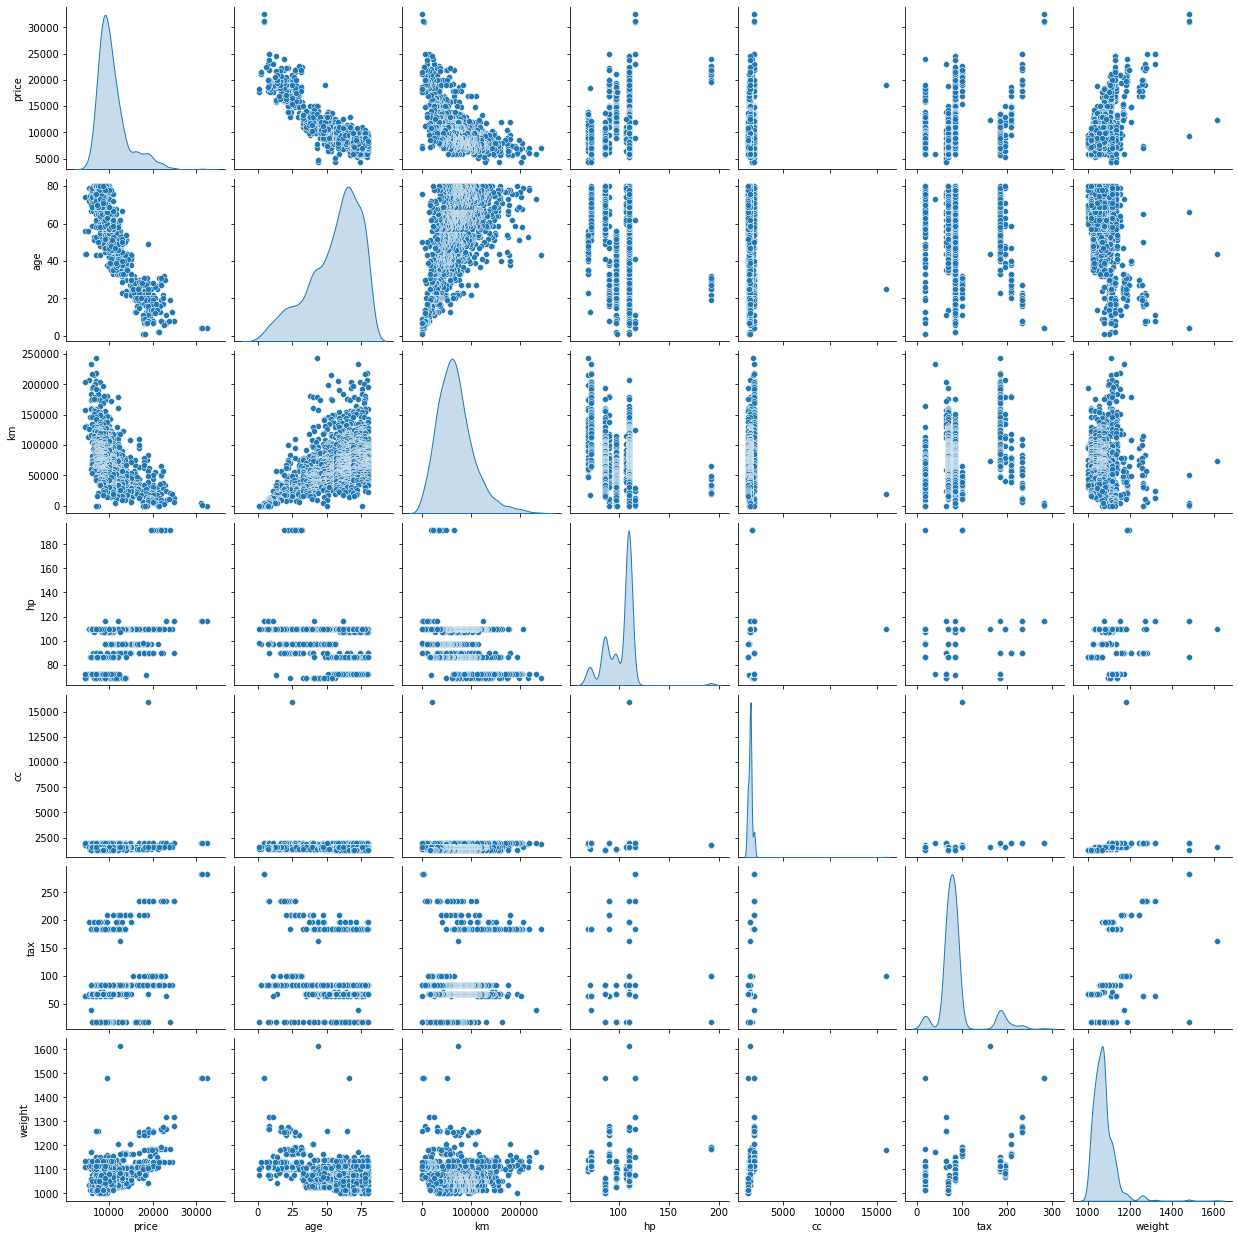

In [27]:
# scatterplot matrix
sns.pairplot(cars, diag_kind= 'kde')

### Predictive Analytics: Choosing Predictors

In [28]:
# choose predictors
predictors = ['age', 'km', 'weight', 'fuel_type','metallic_color','doors']

In [29]:
# target variable
target = 'price'

In [30]:
# creating dummy variables
X = pd.get_dummies(cars[predictors], drop_first = True)
X.head()

,age,km,weight,fuel_type_Diesel,fuel_type_Petrol,metallic_color_1,doors_4,doors_5
0,23,46986,1165,1,0,1,0,0
1,23,72937,1165,1,0,1,0,0
2,24,41711,1165,1,0,1,0,0
3,26,48000,1165,1,0,0,0,0
4,30,38500,1170,1,0,0,0,0


In [31]:
# target variable
y = cars[target]
y[0:5]

0    13500
1    13750
2    13950
3    14950
4    13750
Name: price, dtype: int64

### Predictive Analytics: Creating Training and Test Datasets

In [32]:
# creating train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [33]:
X_train.head()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 328 to 1391
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1147 non-null   int64
 1   km                1147 non-null   int64
 2   weight            1147 non-null   int64
 3   fuel_type_Diesel  1147 non-null   uint8
 4   fuel_type_Petrol  1147 non-null   uint8
 5   metallic_color_1  1147 non-null   uint8
 6   doors_4           1147 non-null   uint8
 7   doors_5           1147 non-null   uint8
dtypes: int64(3), uint8(5)
memory usage: 41.4 KB


In [34]:
y_train.head()

328     12950
1319     8500
1020    11950
1272     8450
1036     8950
Name: price, dtype: int64

In [35]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 643 to 319
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               287 non-null    int64
 1   km                287 non-null    int64
 2   weight            287 non-null    int64
 3   fuel_type_Diesel  287 non-null    uint8
 4   fuel_type_Petrol  287 non-null    uint8
 5   metallic_color_1  287 non-null    uint8
 6   doors_4           287 non-null    uint8
 7   doors_5           287 non-null    uint8
dtypes: int64(3), uint8(5)
memory usage: 10.4 KB


In [36]:
y_val.head()

643     10950
18      16750
1080     7950
1132     6640
584     10500
Name: price, dtype: int64

In [37]:
# standardizing the predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)

### Linear Regression Model

In [38]:
# import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
# linear model
model = LinearRegression()

In [40]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [41]:
# prediction
y_pred = model.predict(X_val)

In [42]:
# MSE mean square error
mean_squared_error(y_val, y_pred)

2542913.2170065665

In [43]:
# RMSE squareroot of MSE
mean_squared_error(y_val, y_pred) ** 0.5

1594.6514405996586

In [44]:
# R squared(0, 1)
r2_score(y_val, y_pred)

0.8212532294612482

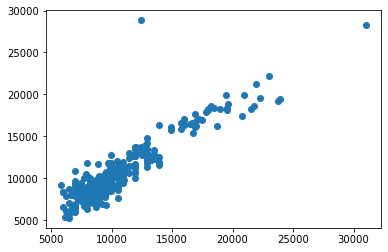

In [45]:
# plot y_val vs y_pred
plt.scatter(y_val, y_pred)

### Crossvalidation Regression

In [46]:
# standardizing the predictor
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [47]:
# Crossvalidation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring ='neg_root_mean_squared_error')
print(scores * -1)
print('Mean RMSE', scores.mean()*-1)

[2983.53206484 2110.51596497 1479.02843564 1178.96155907 1368.99039768
  930.0674086  1480.92650667 1206.81113436  969.72813761 1171.56621041]
Mean RMSE 1488.0127819844995


### KNN Model

In [48]:
# importing KNN
from sklearn.neighbors import KNeighborsRegressor

In [49]:
# Training model
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(X_train_std, y_train)

KNeighborsRegressor()

In [50]:
# predicting the target
y_pred = model.predict(X_val_std)

In [51]:
# Mean Squared Error
mean_squared_error(y_val, y_pred)

2047660.1464808362

In [52]:
# RMSE
mean_squared_error(y_val, y_pred) ** 0.5

1430.9647607404022

In [53]:
#  R Square
r2_score(y_val, y_pred)

0.8560656195828756

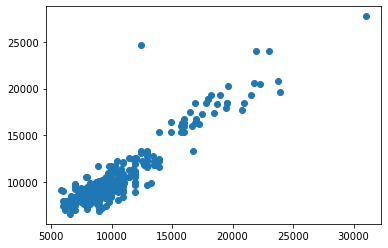

In [54]:
# Scatterplot of y_pred  vs prediction
plt.scatter(y_val, y_pred)

#### Crossvalidation KNN

In [55]:
# Crossvalidation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring ='neg_root_mean_squared_error')
print(scores * -1)
print('Mean RMSE', scores.mean()*-1)

[5045.83868546 2576.89075012 1424.90892516 1610.87503395 1753.10950316
 1119.30900687 1443.98494006 1446.22154702 1007.17131771 1285.84898895]
Mean RMSE 1871.415869847154


### Decision Tree

In [56]:
# importing decision tree
from random import random
from urllib.parse import MAX_CACHE_SIZE
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0, max_depth = 4)
model.fit(X_train_std, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [57]:
# Export the decision tree
from sklearn.tree import export_graphviz
export_graphviz(model, out_file = 'tree.dot', impurity = True, filled = True, rounded = True, feature_names = X_train.columns[0:8])

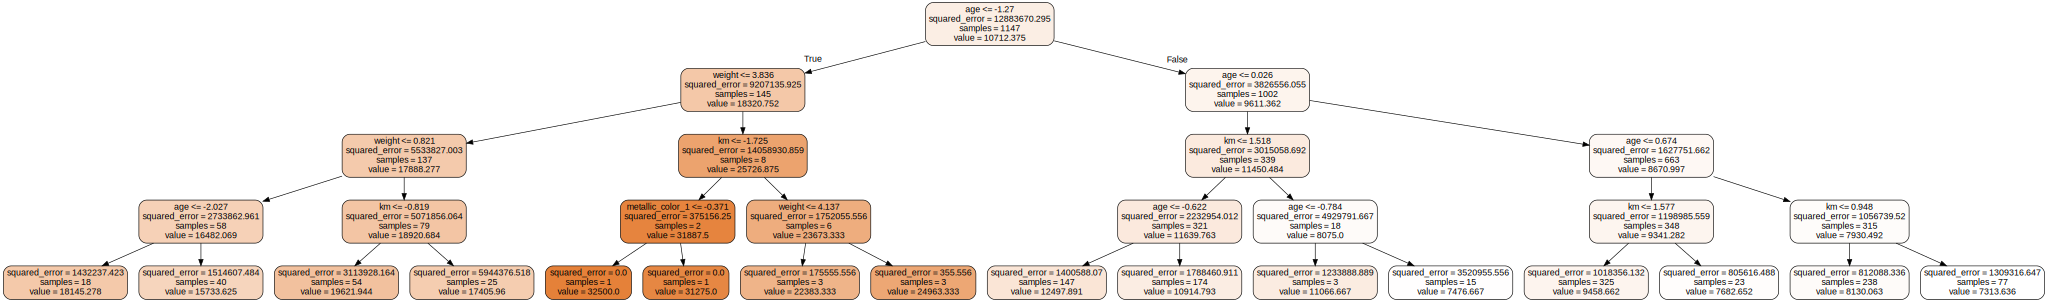

In [58]:
# plot the tree
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [59]:
# predicting car price
y_pred = model.predict(X_val_std)

In [60]:
# Mean Squared Error
mean_squared_error(y_val, y_pred)

1617892.2623019142

In [61]:
# RMSE
mean_squared_error(y_val, y_pred)**0.5

1271.963939072926

In [62]:
# R square
r2_score(y_val, y_pred)

0.8862749168819333

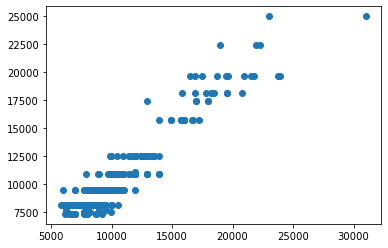

In [63]:
# Scatterplot of y_pred vs y_val
plt.scatter(y_val, y_pred)

#### Crossvalidation Decision Tree

In [64]:
# Crossvalidation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_std, y, cv = 10, scoring ='neg_root_mean_squared_error')
print(scores * -1)
print('Mean RMSE', scores.mean()*-1)

[3981.72914585 2181.62226516 1686.05535872 1768.82996859 1440.1567769
 1081.68952948  935.76484814 1330.80182793 1020.13977593 1076.39367869]
Mean RMSE 1650.3183175393904
